# Neural network which detect numbers from photo

In [42]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print('Versions: ', [v.__name__ + ': ' + v.__version__ for v in [np, matplotlib]])

Versions:  ['numpy: 1.21.5', 'matplotlib: 3.5.1']


## Research Data:

Target: 5


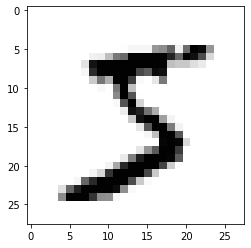

In [43]:
def collect_num_line(num: int, dataset: str) -> tuple:
    """Show line in file"""
    i = 0
    data = None
    with open(dataset, 'r') as file:
        for line in file:
            data = line.split(',')
            if i == num: break
            i += 1
        return int(data.pop(0)), np.asfarray(data).reshape(28,28)

target, array = collect_num_line(0,'mnist_dataset/mnist_train_100.csv')
print(f'Target: {target}')
plt.imshow(array, cmap='Greys', interpolation=None)

In [44]:
# Data normalizing (switch from 0-255 to 0.01-1 selection)
def convert(data: np.array):
    scaled_input = (np.asfarray(data) / 255.0 * 0.99) + 0.01
    return scaled_input

## Data implementation structure:

In [ ]:
class MnistNum:

    def __init__(self, filename: str, field=0) -> None:
        i = 0
        data = None
        with open(filename, 'r') as file:
            for line in file:
                data = line.split(',')
                if i == field: break
                i += 1

        # Ready values:
        self.marker = int(data.pop(0))
        self.image = np.asfarray(data).reshape(28,28)
        self.input_image = (np.asfarray(data) / 255.0 * 0.99) + 0.01
        self.targets = np.zeros(10) + 0.01
        self.targets[self.marker] = 0.99

#print('Normalized data: ', MnistNum('mnist_dataset/mnist_test_10.csv').input_image)

## Used formulas:
#### Activation function:
$$f(x) =  \frac{\mathrm{1} }{\mathrm{1} + e^-x }$$
#### Reverse error distribution with gradient:
$$-(e_o) \times  \sigma( \Sigma_i w_{io} o_i) \times (1 - \sigma(\Sigma_i w_{io} o_i) \times o_i$$

## Neural Network:

In [46]:
class NeuralNetwork:

    @staticmethod
    def activation_func(num: float) -> float:
        # Sigmoid:
        return 1 / (1 + np.exp(-num))

    def __init__(self, inputs: int, hidden1: int, hidden2: int, output: int, learningspeed = 0.3) -> None:
        self.innodes = inputs
        self.hnnodes1 = hidden1
        self.hnnodes2 = hidden2
        self.ounodes = output
        self.lr = learningspeed

        # Initialize weights between nodes:
        self.weights_in_hn1 = np.random.normal(0.0, (self.hnnodes1 ** -0.5),
                                              (self.hnnodes1, self.innodes))
        self.weights_hn1_hn2 = np.random.normal(0.0, (self.hnnodes2 ** -0.5),
                                               (self.hnnodes2, self.hnnodes1))
        self.weights_hn2_ou = np.random.normal(0.0, (self.ounodes ** -0.5),
                                              (self.ounodes, self.hnnodes2))

        #self.weights_in_hn1 = np.random.rand(self.hnnodes1, self.innodes) -0.5
        #self.weights_hn1_hn2 = np.random.rand(self.hnnodes2, self.hnnodes1) -0.5
        #self.weights_hn2_ou = np.random.rand(self.ounodes, self.hnnodes2) -0.5

    def train(self, datapath: str, repeats: int) -> None:
        for i in range(repeats):
            data = MnistNum(datapath, i)
            inputs = np.array(data.input_image, ndmin=2).T
            targets = np.array(data.targets, ndmin=2).T

            hidden_inputs1 = np.dot(self.weights_in_hn1, inputs)
            hidden_outputs1 = self.activation_func(hidden_inputs1)

            hidden_inputs2 =  np.dot(self.weights_hn1_hn2, hidden_outputs1)
            hidden_outputs2 = self.activation_func(hidden_inputs2)

            final_inputs = np.dot(self.weights_hn2_ou, hidden_outputs2)
            final_outputs = self.activation_func(final_inputs)

            output_errors = targets - final_outputs
            hidden_errors2 = np.dot(self.weights_hn2_ou.T, output_errors)
            hidden_errors1 = np.dot(self.weights_hn1_hn2.T, hidden_errors2)

            # Reverse error distribution formula for network weights:
            self.weights_in_hn1 += self.lr * np.dot(
                (hidden_errors1 * hidden_outputs1 * (1.0 - hidden_outputs1)),
                np.transpose(inputs))
            self.weights_hn1_hn2 += self.lr * np.dot(
                (hidden_errors2 * hidden_outputs2 * (1.0 - hidden_outputs2)),
                np.transpose(hidden_outputs1))
            self.weights_hn2_ou += self.lr * np.dot(
                (output_errors * final_outputs * (1.0 - final_outputs)),
                np.transpose(hidden_outputs2))

    def query(self, datapath: str, repeats: int) -> None:
        images = list()
        # Multiply matrix's, sum and activate:
        for i in range(repeats):
            data = MnistNum(datapath, i)

            images.append(data)

            inputs = np.array(data.input_image, ndmin=2).T

            hidden_inputs1 = np.dot(self.weights_in_hn1, inputs)
            hidden_outputs1 = self.activation_func(hidden_inputs1)

            hidden_inputs2 = np.dot(self.weights_hn1_hn2, hidden_outputs1)
            hidden_outputs2 = self.activation_func(hidden_inputs2)

            final_inputs = np.dot(self.weights_hn2_ou, hidden_outputs2)
            final_outputs = self.activation_func(final_inputs)

            print(f'Answer of neural network: {np.unravel_index(final_outputs.argmax(), final_outputs.shape)[0]}')
            print(f'Num on image: {data.marker}:')
            print(final_outputs, '\n')

        for data in images:
            print(f'Target: {data.marker}')
            plt.imshow(data.image, cmap='Greys', interpolation=None)
            plt.show()

Answer of neural network: 7
Num on image: 7:
[[0.06323644]
 [0.0278944 ]
 [0.03098116]
 [0.08777218]
 [0.01934991]
 [0.04357039]
 [0.01710008]
 [0.76565678]
 [0.00247274]
 [0.04325641]] 

Answer of neural network: 2
Num on image: 2:
[[0.03618949]
 [0.02759611]
 [0.44495034]
 [0.07933034]
 [0.01504507]
 [0.1426783 ]
 [0.1964021 ]
 [0.00578222]
 [0.03272294]
 [0.00331003]] 

Answer of neural network: 1
Num on image: 1:
[[0.00385674]
 [0.78990058]
 [0.42734544]
 [0.02131139]
 [0.02018752]
 [0.05513877]
 [0.02698001]
 [0.04269361]
 [0.02675802]
 [0.01616724]] 

Answer of neural network: 0
Num on image: 0:
[[0.77029599]
 [0.00558585]
 [0.06345348]
 [0.05256219]
 [0.02607177]
 [0.13355227]
 [0.07038491]
 [0.08668303]
 [0.00759434]
 [0.00957176]] 

Answer of neural network: 4
Num on image: 4:
[[0.00891991]
 [0.02447424]
 [0.07102393]
 [0.02552551]
 [0.71744721]
 [0.025785  ]
 [0.03590075]
 [0.0681133 ]
 [0.0102821 ]
 [0.05952312]] 

Answer of neural network: 1
Num on image: 1:
[[0.00251062]
 

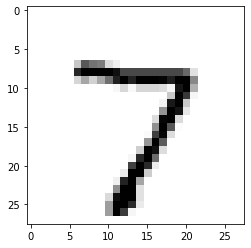

Target: 2


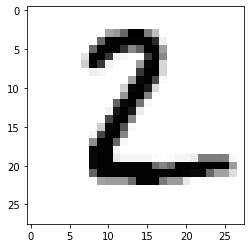

Target: 1


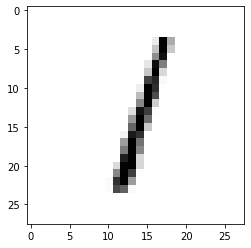

Target: 0


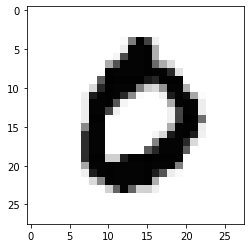

Target: 4


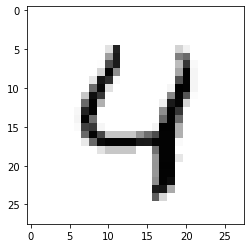

Target: 1


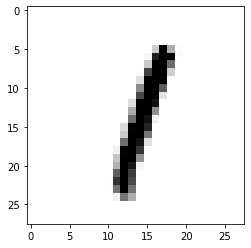

Target: 4


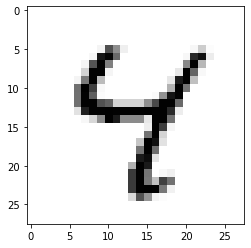

Target: 9


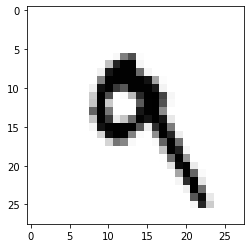

Target: 5


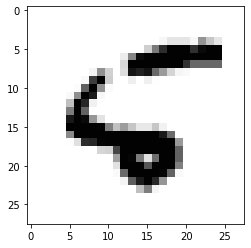

In [47]:
test = NeuralNetwork(784, 64, 16, 10, 0.3)
test.train(datapath='mnist_dataset/mnist_train.csv', repeats=2000)
test.query(datapath='mnist_dataset/mnist_test_10.csv', repeats=9)
# Answer show array with a preferred chance [0,1,2,3,4,5,6,7,8,9]